**Titanic**

In [1]:
#Import odpowiednich bibliotek

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
#Dodanie ścieżki pliku odpowiadającego za testowanie 
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test_shape = test.shape
print(test_shape)

(418, 11)


In [3]:
#Dodanie ścieżki pliku odpowiadającego za trenowanie
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train_shape = train.shape
print(train_shape)

(891, 12)


In [23]:
#Linijka określająca wielkość bazy danych, na podstawie której program będzie się uczył. 
#W tym przypadku im większa liczba zostanie podana tym więcej osób znajdzie się w bazie. 
#Maksymalna ilość danych to 891, jest ona zbyt mała by zaobserwować niepożądane uczenie się "na pamięć".
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,-0.5,0,0,374910,8.0500,NaN,S,Missing,0,0,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Adult,1,0,0
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,Adult,1,0,0
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Adult,0,1,0


In [ ]:
#Wszyscy, którzy ocaleli

train[train["Survived"] == 1]

In [ ]:
#Wszyscy, którzy zginęli

train[train["Survived"] == 0]

In [25]:
#Wyświetlanie tabeli ilustrującej ilość osób, które przeżyły, zależnie od klasy.
import matplotlib.pyplot as plt

Age_pivot = train.pivot_table(index="Pclass",values="Survived")
Age_pivot

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [26]:
#Wyświetlanie tabeli ilustrującej ilość osób, które przeżyły w zależności od wieku.

import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Age",values="Survived")
sex_pivot

,Survived
Age,
-0.50,0.293785
0.42,1.000000
0.67,1.000000
0.75,1.000000
0.83,1.000000
...,...
70.00,0.000000
70.50,0.000000
71.00,0.000000


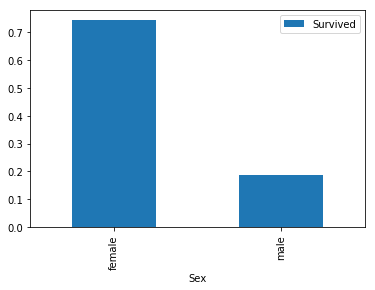

In [27]:
#Wyświetlenie wykresu ilustrującego przeżywalność w zależności od płci.
pclass_pivot = train.pivot_table(index="Sex",values="Survived")
pclass_pivot.plot.bar()
plt.show()

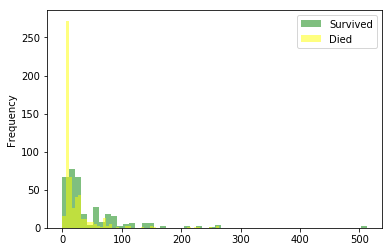

In [32]:
#Wykres przedstawiający przeżywalność w zależności od opłaty

survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Fare"].plot.hist(alpha=0.5,color='green',bins=50)
died["Fare"].plot.hist(alpha=0.5,color='yellow',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [49]:
#Wyświetlanie tabeli ilustrującej, ktora ze zdefiniowanych przez nas grup wiekowych miała największe szczęscie.
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,30,80]
label_names = ["Missing","Child","Adult"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Child,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Child,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,0,1


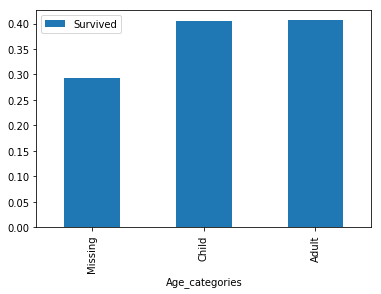

In [50]:
#Wyświetlanie wykresu ilustrującego, ktora ze zdefiniowanych przez nas grup wiekowych miała największe szczęscie.
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train.head()